In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [53]:
df=pd.read_csv('Glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [54]:
columns = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]

In [55]:
df = pd.read_csv('Glass.csv', names=columns)

In [56]:
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [57]:
df.shape

(214, 11)

In [58]:
df.dtypes

ID         int64
RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Class      int64
dtype: object

In [59]:
df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Class   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [61]:
df.isnull()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False


In [62]:
df.isnull().sum()

ID       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [63]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

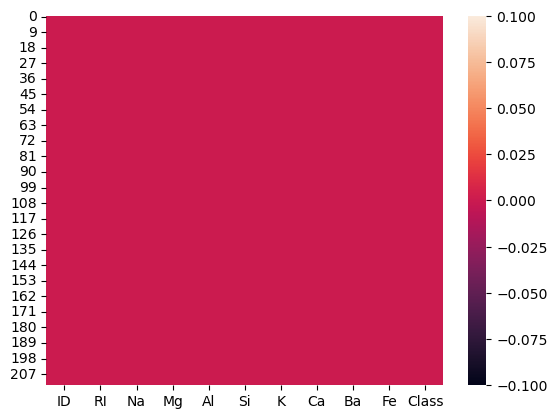

In [64]:
sns.heatmap(df.isnull())

In [65]:
dfcor=df.corr()
dfcor

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
ID,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<AxesSubplot:>

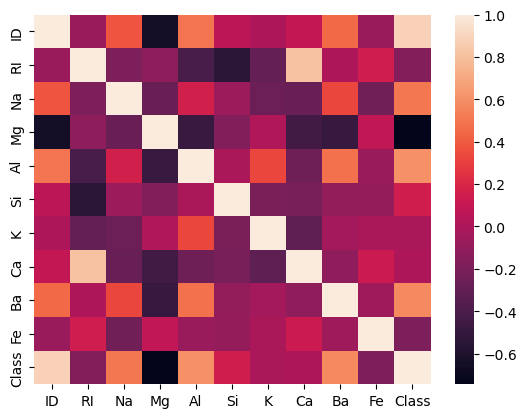

In [66]:
sns.heatmap(dfcor)

<AxesSubplot:>

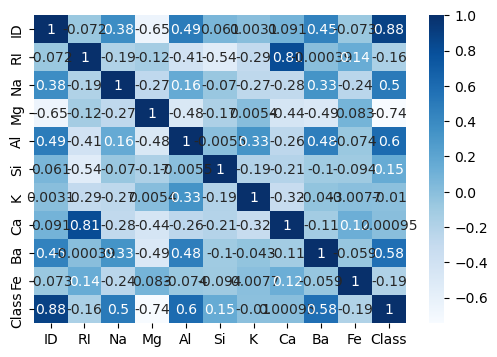

In [67]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

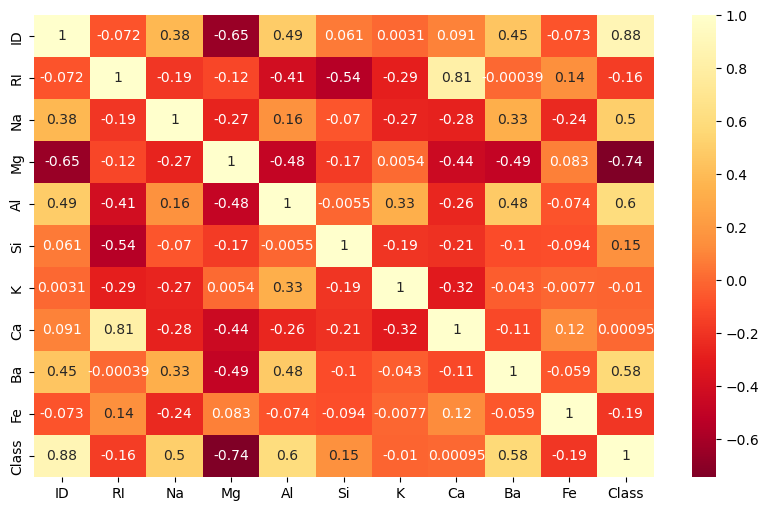

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

ID          AxesSubplot(0.125,0.53;0.110714x0.35)
RI       AxesSubplot(0.257857,0.53;0.110714x0.35)
Na       AxesSubplot(0.390714,0.53;0.110714x0.35)
Mg       AxesSubplot(0.523571,0.53;0.110714x0.35)
Al       AxesSubplot(0.656429,0.53;0.110714x0.35)
Si       AxesSubplot(0.789286,0.53;0.110714x0.35)
K           AxesSubplot(0.125,0.11;0.110714x0.35)
Ca       AxesSubplot(0.257857,0.11;0.110714x0.35)
Ba       AxesSubplot(0.390714,0.11;0.110714x0.35)
Fe       AxesSubplot(0.523571,0.11;0.110714x0.35)
Class    AxesSubplot(0.656429,0.11;0.110714x0.35)
dtype: object

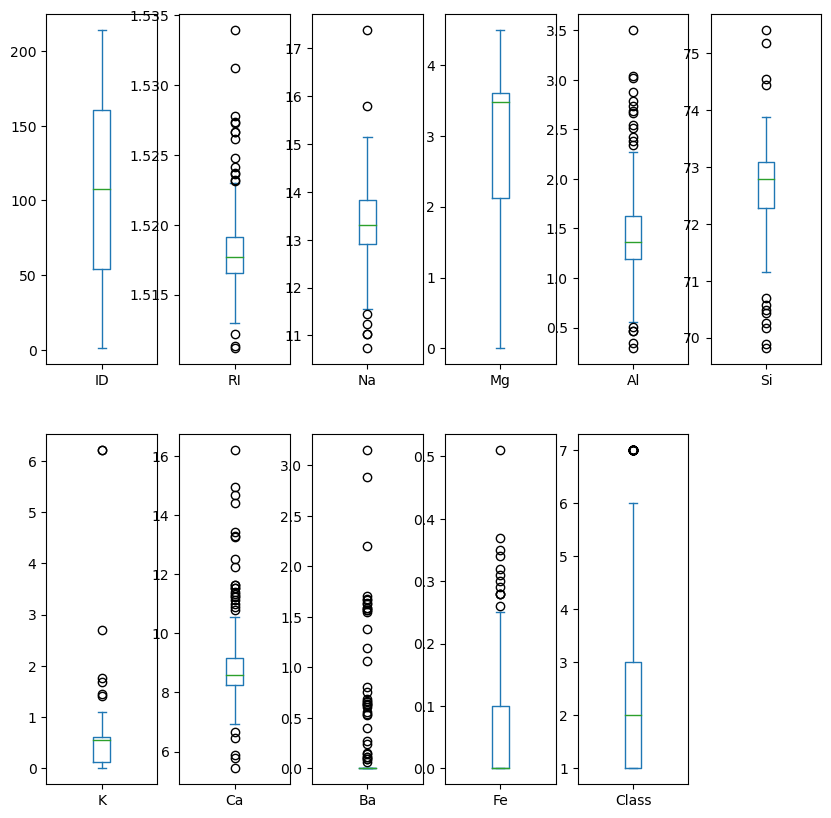

In [69]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

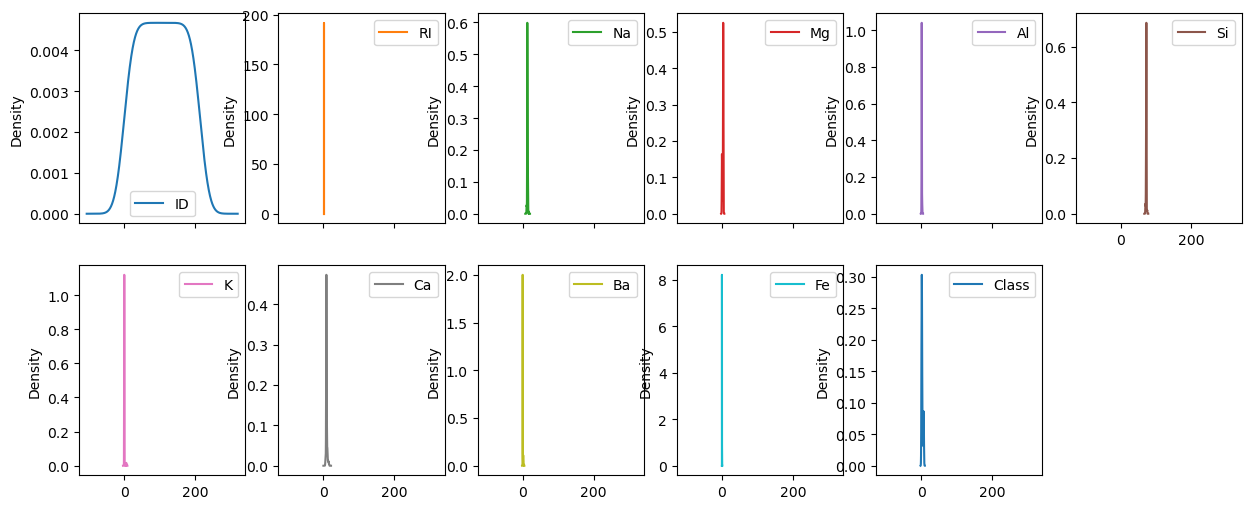

In [70]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

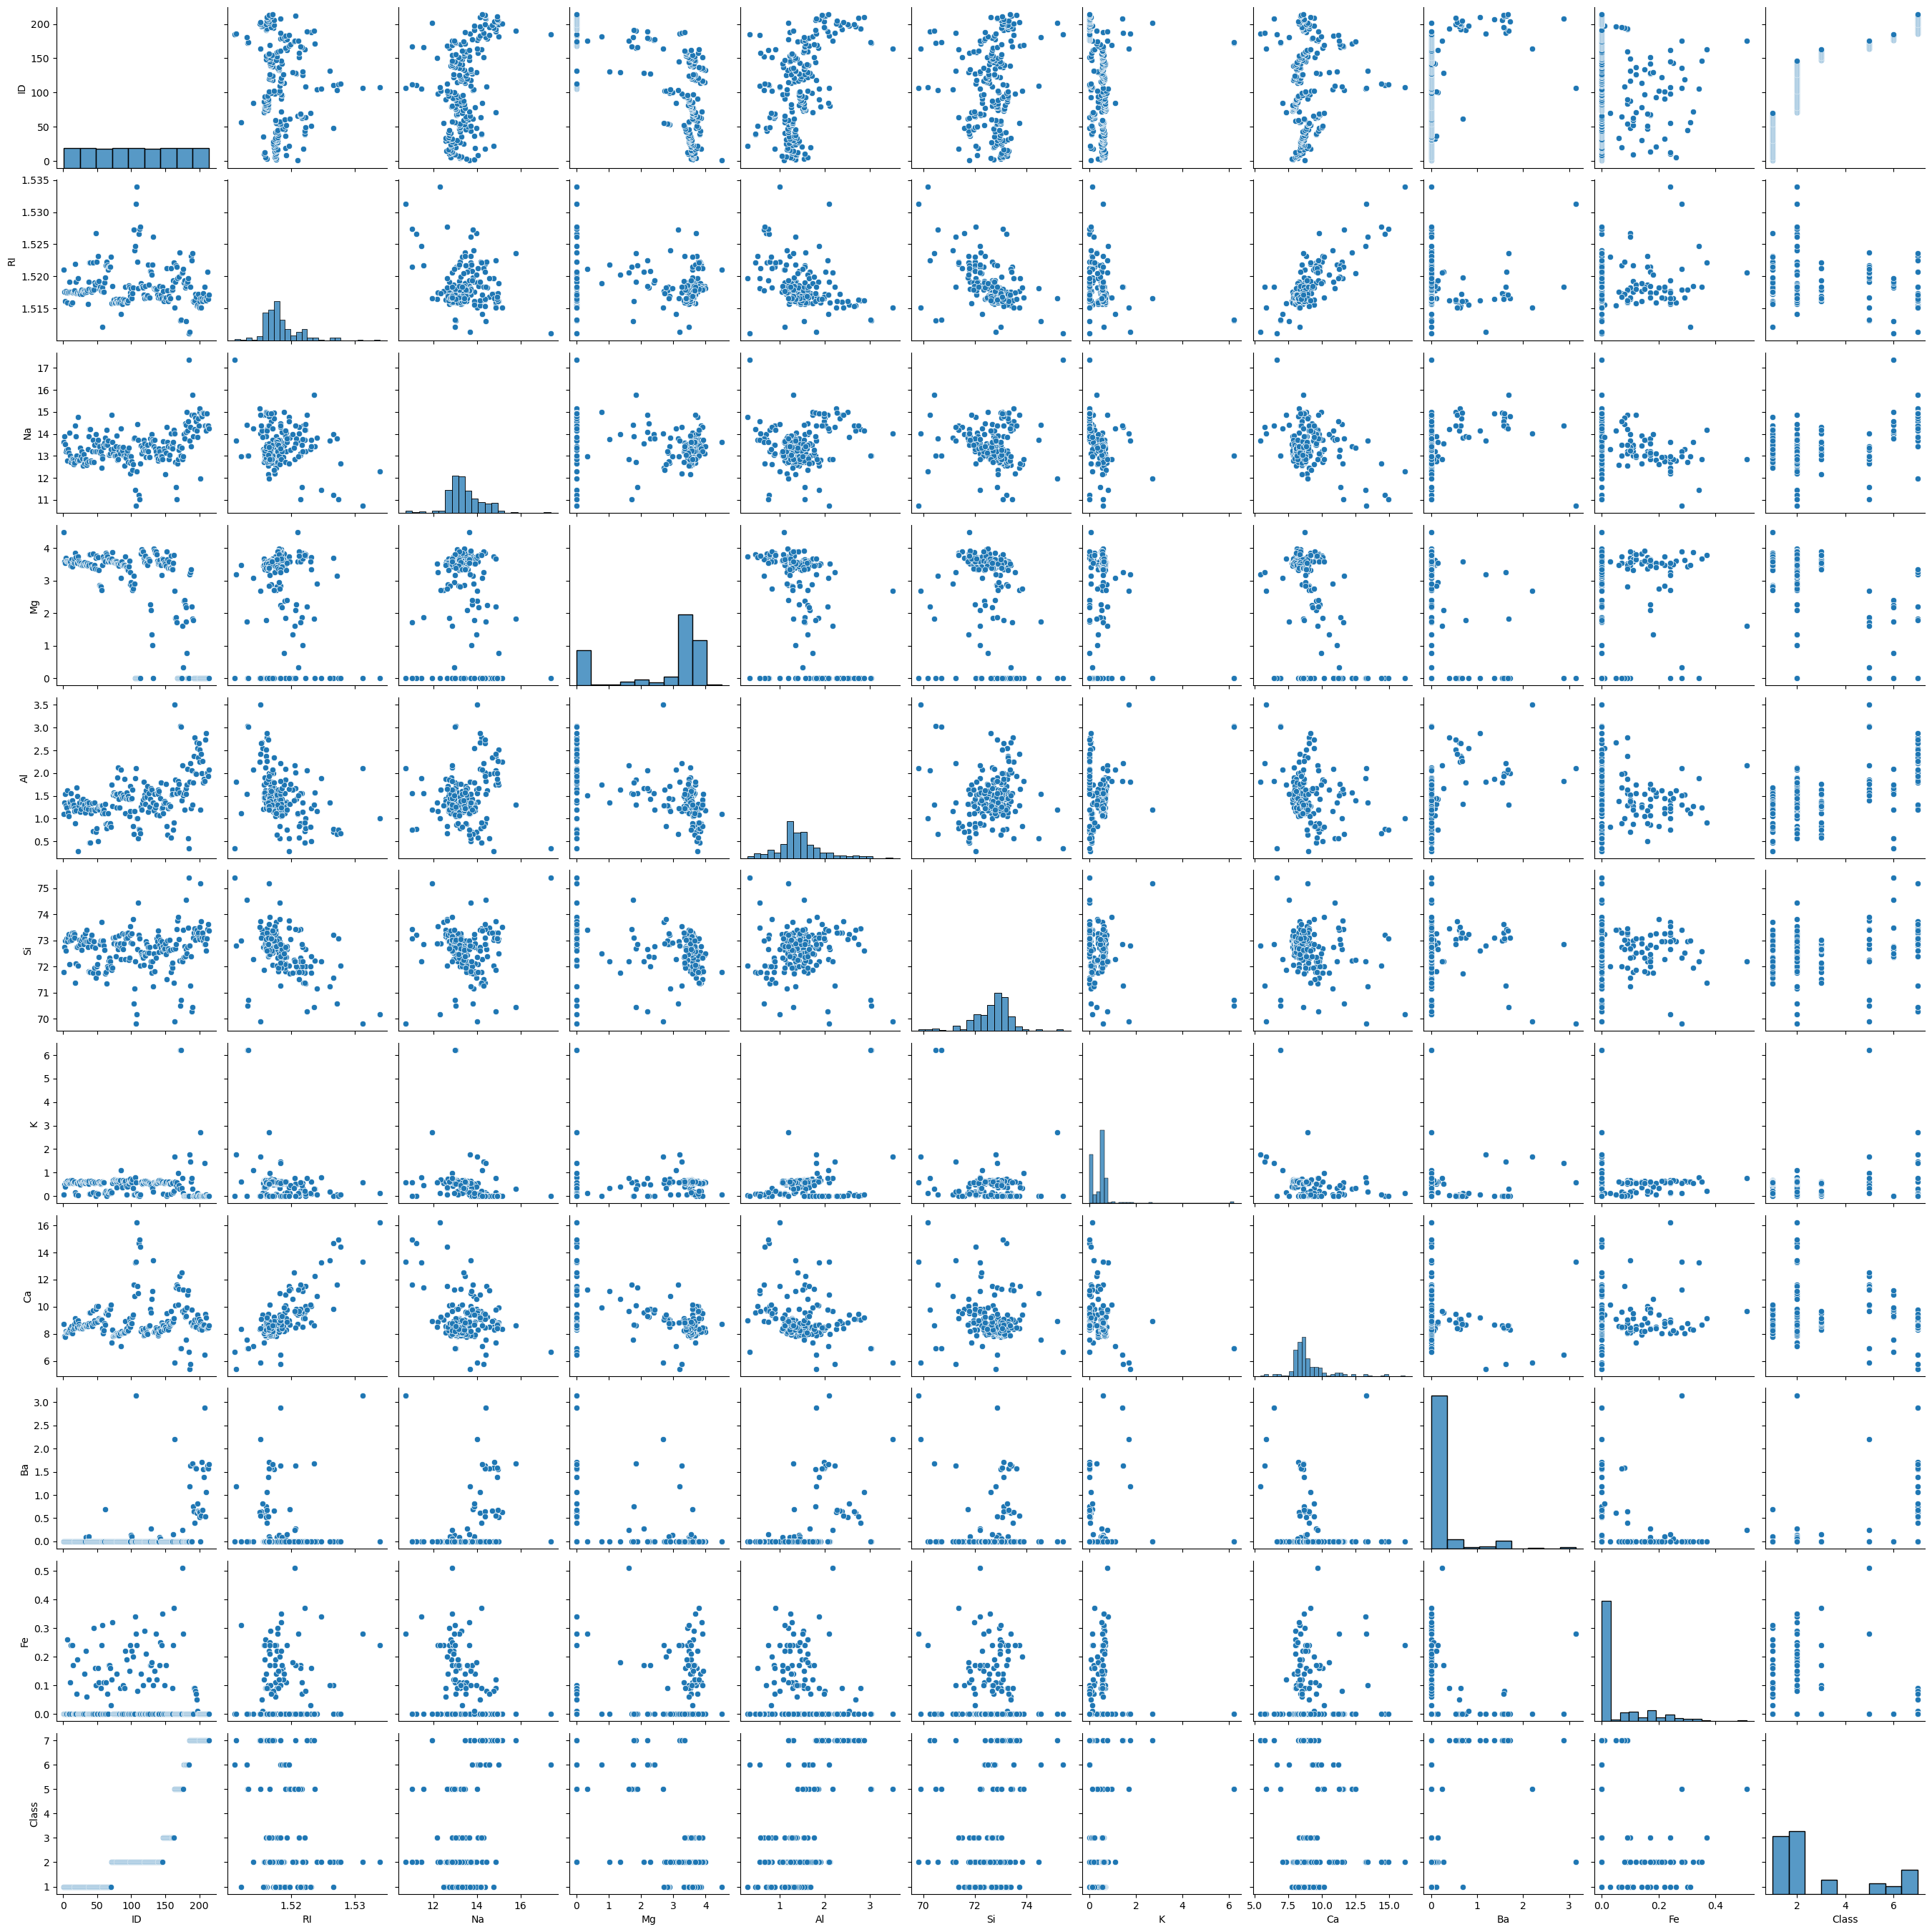

In [71]:
sns.pairplot(df)

In [72]:
x=df.iloc[:,0:-1]
x

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [73]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Class, Length: 214, dtype: int64

In [74]:
x.shape

(214, 10)

In [75]:
y.shape

(214,)

In [76]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [77]:
x_train.shape

(171, 10)

In [78]:
y_train.shape

(43, 10)

In [79]:
x_test.shape

(171,)

In [80]:
y_test.shape

(43,)

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
mnb=MultinomialNB()

In [87]:
x_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,80,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
161,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
109,110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
127,128,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
95,96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
14,15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
92,93,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,180,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00


In [88]:
y_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,198,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,192,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,118,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
15,16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
86,87,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00
75,76,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
144,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24


In [ ]:
mnb.fit(x_train,y_train)